In [25]:
%pip install torch torchvision torchaudio

  Using cached torch-2.4.1-cp38-none-macosx_11_0_arm64.whl.metadata (26 kB)
  Using cached torchvision-0.19.1-cp38-cp38-macosx_11_0_arm64.whl.metadata (6.0 kB)
  Using cached torchaudio-2.4.1-cp38-cp38-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.1-py3-none-any.whl.metadata (5.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached MarkupSafe-2.1.5-cp38-cp38-macosx_10_9_universal2.whl.metadata (3.0 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.4.1-cp38-none-macosx_11_0_arm64.whl (62.1 MB)
Using cached torchvision-0.19.1-cp38-cp38-macosx_11_0_arm64.whl (1.7 MB)
Using cached torchaudio-2.4.1-cp38-cp38-macosx_11_0_arm64.whl (1.8 MB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
Using cached sympy-1.13.3-py3-none-any.whl (6.2 MB)
Using cached MarkupSafe-2.1.5-cp38-cp38-macosx_10_9_u

In [72]:
# Very first thing is to clean our data. Let's make a csv file with only the relevant columns:
import pandas as pd
import numpy as np


# Edit the next line to pick what we are researching
research = 'loan'

file_path = f'data/{research}_data.csv'  

if research == "diabetic":
    df = pd.read_csv(file_path)
    # Only keep the columns we need
    selected_columns = [
        'race', 'gender', 'age',
        'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
        'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
        'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
        'max_glu_serum', 'A1Cresult', 'diabetesMed'
    ]
    df = df[selected_columns]
    # Keep only rows where gender is "Male" or "Female"
    df = df[df['gender'].isin(['Male', 'Female'])]

    # Drop rows where race is missing (i.e., "?")
    df = df[df['race'] != '?']
    df['target'] = df['diabetesMed'].map({'Yes': 1, 'No': 0})

    

    # Drop rows where target is missing
    df = df[df['target'].notna()]

    # One-hot encode categorical features
    categorical_features = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult']
    df = pd.get_dummies(df, columns=categorical_features)

    # Don't keep diabetesMed column
    df_with_target = df.copy()
    df = df.drop(columns=['diabetesMed'])

elif research == 'income':
    df = pd.read_csv(file_path)
    selected_columns = [
        'age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
    ]
    df = df[selected_columns]       
    # Keep only rows where gender is "Male" or "Female"
    df = df[df['sex'].isin(['Male', 'Female'])]

    # Drop rows where race is missing (i.e., "?")
    df = df[df['race'] != '?']
    df = df[df['workclass'] != '?']
    df = df[df['occupation'] != '?']
    df = df[df['native-country'] != '?']
    df['target'] = df['income'].map({'>50K': 1, '<=50K': 0})

    

    # Drop rows where target is missing
    df = df[df['target'].notna()]

    # One-hot encode categorical features
    categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
    df = pd.get_dummies(df, columns=categorical_features)
    
    # Don't keep income column
    df_with_target = df.copy()
    df = df.drop(columns=['income'])

elif research == 'loan':
    
    # Rename FIRST
    df = pd.read_csv(file_path, dtype=str, low_memory=False)
    df.rename(columns={'derived_race': 'race', 'derived_sex': 'sex'}, inplace=True)
    df['race'] = df['race'].replace({'Black or African American': 'Black'})
    # Use the renamed column names
    selected_columns = [
        'derived_dwelling_category', 'conforming_loan_limit', 'race', 'sex', 'action_taken', 'loan_type', 'loan_purpose',
        'lien_status', 'reverse_mortgage', 'open-end_line_of_credit', 'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio', 'hoepa_status', 'loan_term', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'other_nonamortizing_features',
        'property_value', 'occupancy_type', 'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest',
        'income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'applicant_race_observed', 'applicant_sex_observed', 'applicant_age', 
        'tract_population', 'tract_minority_population_percent', 'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage'
    ]
    df = df[selected_columns]

    # Now use renamed 'race' safely
    categorical_features = ['derived_dwelling_category', 'conforming_loan_limit', 'race', 'sex', 'loan_type', 'loan_purpose', 'lien_status',
                            'reverse_mortgage', 'open-end_line_of_credit', 'business_or_commercial_purpose', 'hoepa_status', 'negative_amortization', 'interest_only_payment',
                            'balloon_payment', 'other_nonamortizing_features', 'occupancy_type', 'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest',
                            'debt_to_income_ratio', 'applicant_credit_score_type', 'applicant_race_observed', 'applicant_sex_observed', 'applicant_age']

    # Drop rows with invalid categorical values
    invalid_vals = ['', 'nan', 'NaN', 'NA']
    df = df[~df[categorical_features].astype(str).isin(invalid_vals).any(axis=1)]

    # Create target
    df['target'] = df['action_taken'].map({'1': 1, '3': 0})

    # One-hot encode
    df = pd.get_dummies(df, columns=categorical_features)
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # invalid values → NaN
    # Finalize
    df = df.dropna()
    df_with_target = df.copy()
    df = df.drop(columns=['action_taken'])

print(len(df.columns))
col = "target"
unique_count = df[col].nunique()
    
print(f"\n{col}:")

print(f"Unique values: {unique_count}") 
print(df[col].value_counts())
    

116

target:
Unique values: 2
target
1    280180
0     88862
Name: count, dtype: int64


In [73]:
# We want to divide our data into training, evaluation, and testing sets
from sklearn.model_selection import train_test_split

X = df.drop(columns='target')
y = df['target']
# First split: 80% for train+eval, 20% for test

X_train_eval, X_test, y_train_eval, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# Second split: 70% for train, 10% for eval (from the remaining 80%)
# We use 0.125 because 0.1/0.8 = 0.125 to get 10% of the total data
X_train, X_eval, y_train, y_eval = train_test_split(X_train_eval, y_train_eval, stratify=y_train_eval, test_size=0.125, random_state=42)
print(f"Training set size: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Evaluation set size: {len(X_eval)} ({len(X_eval)/len(df)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)
X_test_scaled = scaler.transform(X_test)


Training set size: 258328 (70.0%)
Evaluation set size: 36905 (10.0%)
Test set size: 73809 (20.0%)


In [74]:
# Train a simple logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = logreg.predict(X_eval_scaled)
y_prob = logreg.predict_proba(X_eval_scaled)[:, 1]

accuracy = accuracy_score(y_eval, y_pred)
auc = roc_auc_score(y_eval, y_prob)
report = classification_report(y_eval, y_pred, output_dict=True)

print(f"Accuracy: {accuracy:.6f}, \nAUC: {auc:.6f}, \nPrecision: {report['1']['precision']:.6f},\nRecall: {report['1']['recall']:.6f}, \nF1: {report['1']['f1-score']:.6f}")


Accuracy: 0.973906, 
AUC: 0.996313, 
Precision: 0.987355,
Recall: 0.978158, 
F1: 0.982735


In [75]:
# Get feature names
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"x{i}" for i in range(X_train.shape[1])]

# Get coefficients
coefs = logreg.coef_[0]  # shape: (n_features,)

# Create a DataFrame for easy viewing
importance_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefs,
    'abs_coef': np.abs(coefs)
})

# Sort by magnitude of coefficient
importance_df = importance_df.sort_values(by='abs_coef', ascending=False)

print(importance_df.head(20))  # Top 20 most influential features

                                               feature  coefficient  abs_coef
44                                      hoepa_status_3    -3.469871  3.469871
43                                      hoepa_status_2     3.449377  3.449377
88                           debt_to_income_ratio_>60%    -1.093951  1.093951
1                                  loan_to_value_ratio    -0.654478  0.654478
25                                      loan_purpose_1     0.452776  0.452776
57                                    occupancy_type_1    -0.432298  0.432298
86                        debt_to_income_ratio_50%-60%    -0.415087  0.415087
59                                    occupancy_type_3     0.330219  0.330219
26                                      loan_purpose_2    -0.296617  0.296617
58                                    occupancy_type_2     0.278070  0.278070
103                          applicant_race_observed_3    -0.256598  0.256598
42                                      hoepa_status_1     0.240

In [76]:
# Now we train a CNN instead, just to compare results
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [7]:
# Prepare the data
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(1)  # Add channel dim
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_eval_tensor = torch.tensor(X_eval_scaled, dtype=torch.float32).unsqueeze(1)
y_eval_tensor = torch.tensor(y_eval.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
eval_dataset = TensorDataset(X_eval_tensor, y_eval_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

# CNN model
class TabularCNN(nn.Module):
    def __init__(self, input_len):
        super(TabularCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=8, kernel_size=3)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear((input_len - 2) * 8, 32)  # Adjust shape after conv
        self.fc2 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Instantiate model
model = TabularCNN(input_len=X_train_scaled.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [9]:
def evaluate(verbose=False):
    model.eval()
    with torch.no_grad():
        y_pred_prob = model(X_eval_tensor).numpy()
        y_pred_label = (y_pred_prob > 0.5).astype(int)
    y_true = y_eval_tensor.numpy().astype(int)
    accuracy = accuracy_score(y_true, y_pred_label)
    if(verbose):
        auc = roc_auc_score(y_true, y_pred_prob)
        report = classification_report(y_true, y_pred_label, output_dict=True)
        print(f"Accuracy: {accuracy}, \nAUC: {auc}, \nPrecision: {report['1']['precision']},\nRecall: {report['1']['recall']}, \nF1: {report['1']['f1-score']}")
    return accuracy

In [11]:
# Training loop
max_eval_accuracy = 0
max_epochs = 1000
max_epochs_without_improvement = 50
current_epochs_without_improvement = 0
model_save_filepath = f'models/baselineCNN_{research}'
from pathlib import Path

if Path(model_save_filepath).exists():
    model.load_state_dict(torch.load(model_save_filepath, weights_only=True))
    max_eval_accuracy = evaluate()
for epoch in range(max_epochs):
    model.train()
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} loss: {loss.item():.4f}")
    # Evaluate
    model.eval()
    with torch.no_grad():
        predictions = model(X_eval_tensor)
        predicted_classes = (predictions > 0.5).float()
    accuracy = (predicted_classes == y_eval_tensor).float().mean().item()
    print(f"Evaluation Accuracy: {accuracy:.4f}")
    if(accuracy > max_eval_accuracy):
        torch.save(model.state_dict(), model_save_filepath)
        current_epochs_without_improvement = 0
        max_eval_accuracy = accuracy
        print("Saved model")
    else:
        current_epochs_without_improvement += 1
        if current_epochs_without_improvement > max_epochs_without_improvement:
            break


Epoch 1 loss: 0.6485
Evaluation Accuracy: 0.7015
Saved model
Epoch 2 loss: 0.4193
Evaluation Accuracy: 0.7740
Saved model
Epoch 3 loss: 0.4361
Evaluation Accuracy: 0.7933
Saved model
Epoch 4 loss: 0.3682
Evaluation Accuracy: 0.8169
Saved model
Epoch 5 loss: 0.4701
Evaluation Accuracy: 0.8306
Saved model
Epoch 6 loss: 0.4421
Evaluation Accuracy: 0.8351
Saved model
Epoch 7 loss: 0.2585
Evaluation Accuracy: 0.8362
Saved model
Epoch 8 loss: 0.3624
Evaluation Accuracy: 0.8375
Saved model
Epoch 9 loss: 0.4068
Evaluation Accuracy: 0.8382
Saved model
Epoch 10 loss: 0.3083
Evaluation Accuracy: 0.8390
Saved model
Epoch 11 loss: 0.3273
Evaluation Accuracy: 0.8379
Epoch 12 loss: 0.3132
Evaluation Accuracy: 0.8382
Epoch 13 loss: 0.3714
Evaluation Accuracy: 0.8402
Saved model
Epoch 14 loss: 0.3487
Evaluation Accuracy: 0.8413
Saved model
Epoch 15 loss: 0.4747
Evaluation Accuracy: 0.8415
Saved model
Epoch 16 loss: 0.3995
Evaluation Accuracy: 0.8424
Saved model
Epoch 17 loss: 0.2909
Evaluation Accuracy

In [12]:
# Evaluate

model.load_state_dict(torch.load(model_save_filepath, weights_only=True))
accuracy = evaluate(verbose=True)


Accuracy: 0.858722087110325, 
AUC: 0.9100679875038085, 
Precision: 0.7510416666666667,
Recall: 0.6431757359500446, 
F1: 0.6929360884190293


In [31]:
# Now we experiment
# This can mostly be done for the final project step, but let's do a similar analysis to HW1, seeing the bias in the data itself.
from matplotlib import pyplot as plt


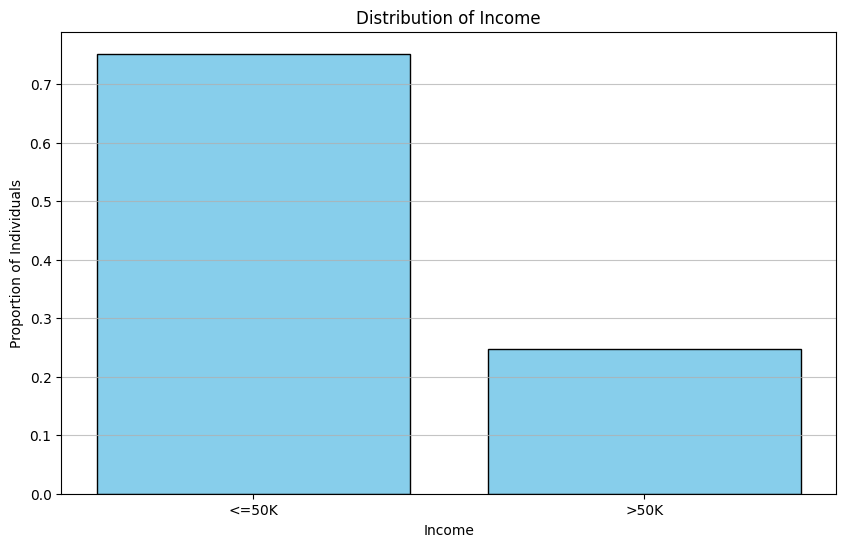

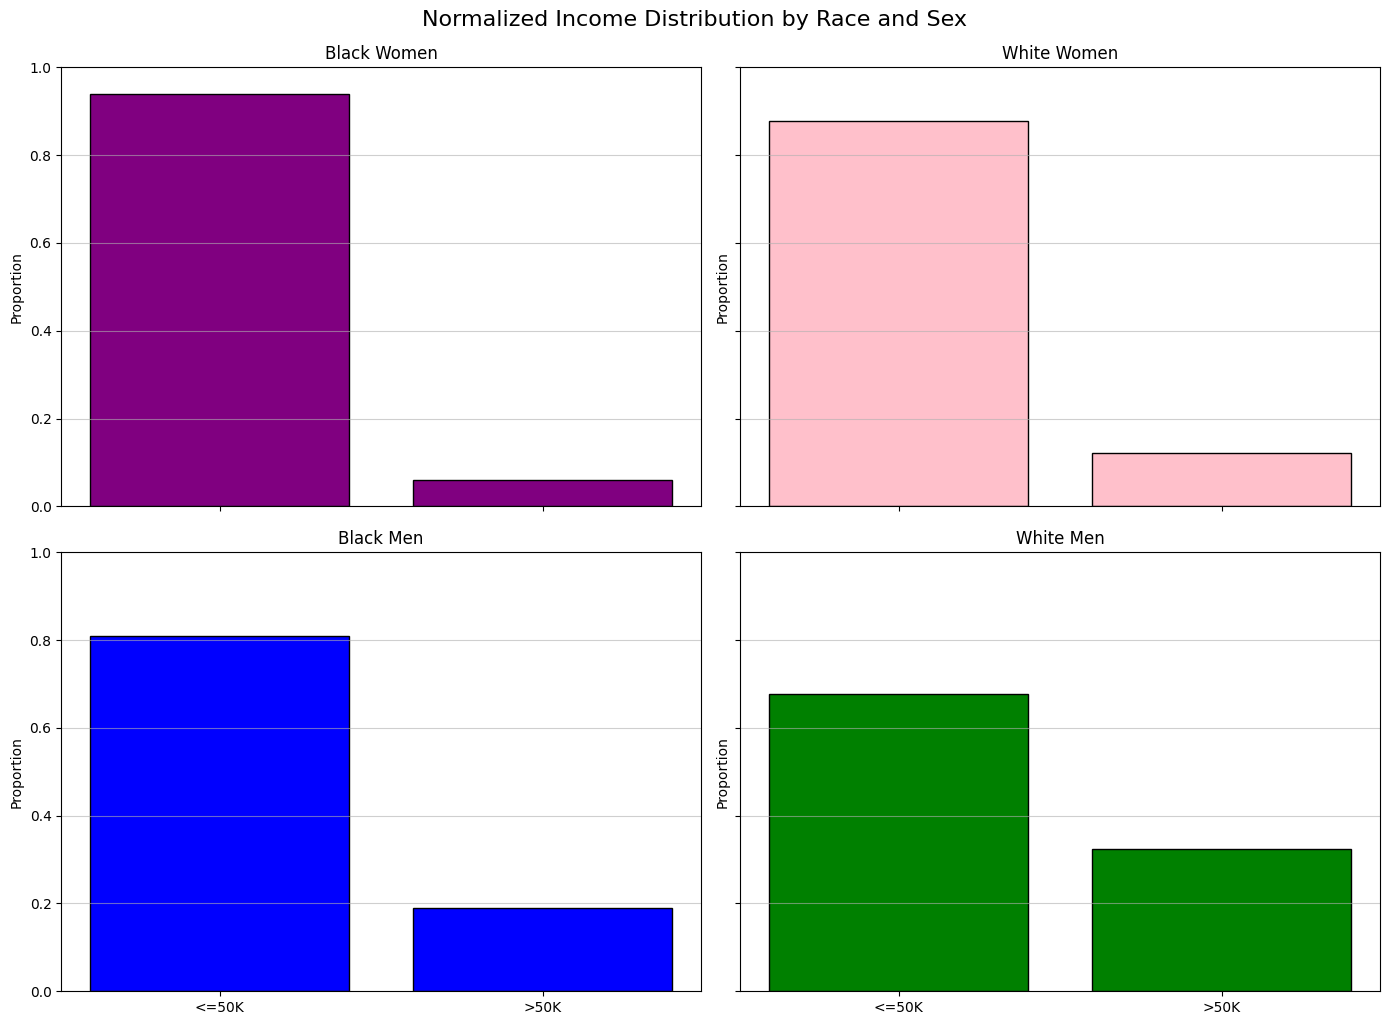

In [36]:
if research == 'income':
    plt.figure(figsize=(10, 6))
    income_counts = df_with_target['income'].value_counts(normalize=True).sort_index()
    labels = ['<=50K', '>50K']  # Adjust if needed
    plt.bar(labels, income_counts, color='skyblue', edgecolor='black')
    plt.title('Distribution of Income')
    plt.xlabel('Income')
    plt.ylabel('Proportion of Individuals')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # b. Plot the distribution of scores for (four separate histograms): 
    # Black women, white women, Black men, white men
    black_women = df_with_target[(df_with_target['race_Black'] == 1) & (df_with_target['sex_Female'] == 1)]
    white_women = df_with_target[(df_with_target['race_White'] == 1) & (df_with_target['sex_Female'] == 1)]
    black_men = df_with_target[(df_with_target['race_Black'] == 1) & (df_with_target['sex_Male'] == 1)]
    white_men = df_with_target[(df_with_target['race_White'] == 1) & (df_with_target['sex_Male'] == 1)]

    fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)


    # Helper function to plot normalized histograms
    def plot_normalized_hist(ax, data, title, color):
        counts = data['income'].value_counts(normalize=True).sort_index()
        ax.bar(labels, counts, color=color, edgecolor='black')
        ax.set_title(title)
        ax.set_ylim(0, 1)  # percentage scale

    plot_normalized_hist(axes[0, 0], black_women, 'Black Women', 'purple')
    plot_normalized_hist(axes[0, 1], white_women, 'White Women', 'pink')
    plot_normalized_hist(axes[1, 0], black_men, 'Black Men', 'blue')
    plot_normalized_hist(axes[1, 1], white_men, 'White Men', 'green')

    for ax in axes.flat:
        ax.set_ylabel('Proportion')
        ax.grid(axis='y', alpha=0.6)

    plt.tight_layout()
    plt.suptitle('Normalized Income Distribution by Race and Sex', fontsize=16, y=1.02)
    plt.show()

